<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee 
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [770]:
#Write code here
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [771]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df=data.copy()

In [772]:
# Find the shape
df.shape

(14999, 10)

In [773]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [774]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [775]:
# Find the basic statistics
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [776]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Find out the how many employees left the company?**

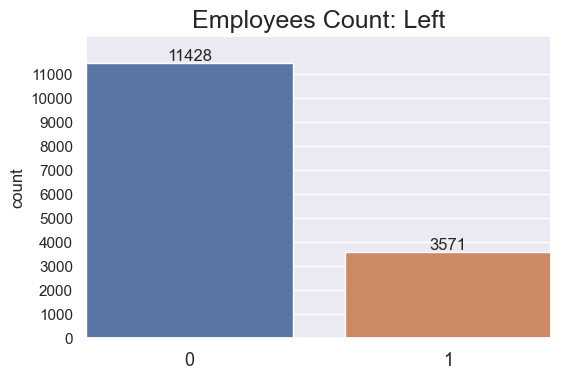

In [777]:
# Count of how many employees left the company
fig = plt.figure( dpi=100)
ax = sns.countplot(data=df, x='left')
plt.title('Employees Count: Left', fontsize=18);
plt.xlabel('')
plt.margins(x=0.0, y=0.1)
plt.yticks(range(0,12000, 1000))
plt.xticks(fontsize=13)
for container in ax.containers:
    plt.bar_label(container, fontsize=12)

**Question:What can you interpret from the plot above?** 

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue"> Plot shows that **3571** employees left the company while **11428** are yet company's serving employees.</font>

**Task 3: Find out the number of projects being handled.**

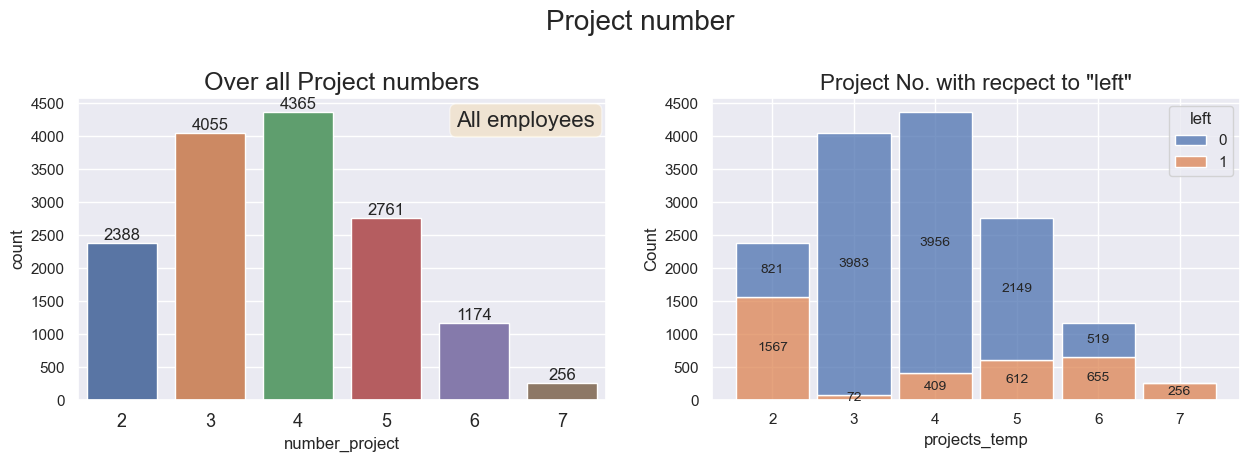

In [778]:
# Write code here
fig = plt.figure( figsize=(15,4), dpi=100)
plt.suptitle('Project number', fontsize=20, y=1.1);
fig.subplots_adjust( wspace=.2)
ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(data=df, x='number_project')
plt.title('Over all Project numbers', fontsize=18);
box = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(3.8,4150,'All employees', bbox=box, fontsize=16)
#plt.margins(x=0.0, y=0.1)
plt.yticks(range(0,5000,500))
plt.xticks(fontsize=13)
for container in ax1.containers:
    plt.bar_label(container, fontsize=12)

ax2 = plt.subplot(1,2,2)
df['projects_temp']=df.number_project.astype('str')
plt.title('Project No. with recpect to "left"', fontsize=16)
ax2 = sns.histplot(data=df.sort_values(by='number_project'), x="projects_temp", hue="left", multiple="stack", shrink=.9)
plt.yticks(range(0,5000,500))
for c in ax2.containers:
    labels = [int(value) if value!=0 else '' for value in c.datavalues]
    ax2.bar_label(c, labels=labels, label_type='center',fontsize=10)
df.drop('projects_temp', axis=1, inplace=True)

**Question: What insights can you infer from the above plot?**

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue"> We can see that **majority of employees** are working on **3 or 4 projects**, But we can also see that there are **some employees who are being stressed more** to work on **6 projects**.</font>

> * <font face="Comic sans MS" size="3" color="blue"> More over,all employees who were **working on 7 project left the company**,  while the **ratio of employee left** is very **low** where they were working on **reasonable number of projects**, i.e. 3 or 4 projects .</font>

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

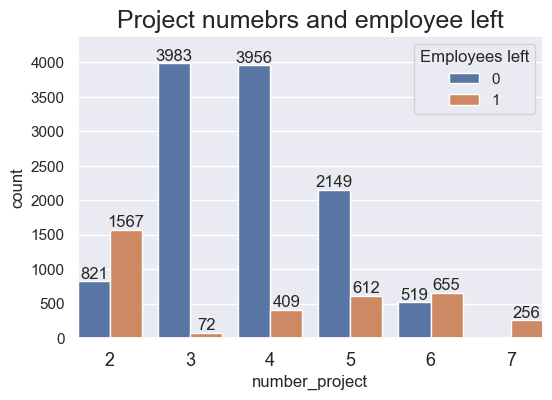

In [779]:
fig = plt.figure( dpi=100)
ax2 = sns.countplot(data=df, x='number_project', hue='left')
plt.legend(loc='upper right', title='Employees left')
plt.title('Project numebrs and employee left', fontsize=18);
plt.margins(x=0.0, y=0.1)
plt.xticks(fontsize=13)
for labels in ax2.containers:
    plt.bar_label(labels, fontsize=12)

**Task 5:** Make a plot of your findings (only turn-over employees)

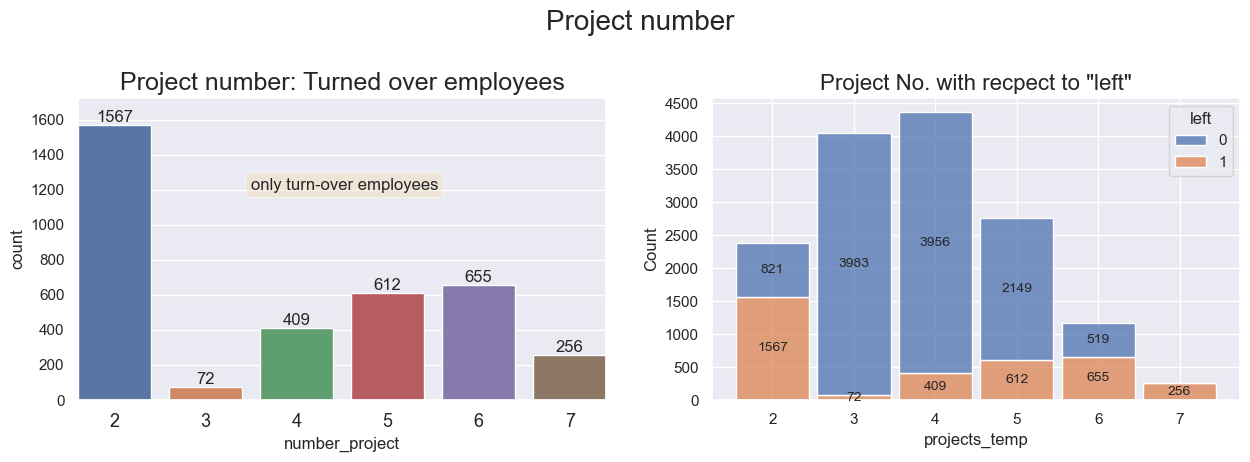

In [780]:
# Write code here
fig = plt.figure( figsize=(15,4), dpi=100)
plt.suptitle('Project number', fontsize=20, y=1.1);
fig.subplots_adjust( wspace=.2)

ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(data=df[df['left']==1], x='number_project')
plt.title('Project number: Turned over employees', fontsize=18);
box = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
plt.text(1.5,1200,'only turn-over employees', bbox=box, fontsize=12)
plt.margins(x=0.0, y=0.1)
plt.xticks(fontsize=13)
for container in ax1.containers:
    plt.bar_label(container, fontsize=12)

ax2 = plt.subplot(1,2,2)
df['projects_temp']=df.number_project.astype('str')
plt.title('Project No. with recpect to "left"', fontsize=16)
ax2 = sns.histplot(data=df.sort_values(by='number_project'), x="projects_temp", hue="left", multiple="stack", shrink=.9)
plt.yticks(range(0,5000,500))
for c in ax2.containers:
    labels = [int(value) if value!=0 else '' for value in c.datavalues]
    ax2.bar_label(c, labels=labels, label_type='center',fontsize=10)
df.drop('projects_temp', axis=1, inplace=True)

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">**All employees** who were **working on 7 project left the company**</font>
>     * it shows that all employees who were given a lot of **stress** left the compnay.

> * <font face="Comic sans MS" size="3" color="blue">Along with above, **second highest** 'employees turned-over **ratio**' is of those, who were working on **only two projects**. </font>
>     * This is surprising, but may be those employees left because either they were **fresh grads** or they were given **low salary**.

> * <font face="Comic sans MS" size="3" color="blue">**Lowest Ratio of Turned-over** employees are among those who were working on **reasonable number of projects**. i.e. 3 or 4. </font>
>     * **fair workload** results in quality work and **happy employee**.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

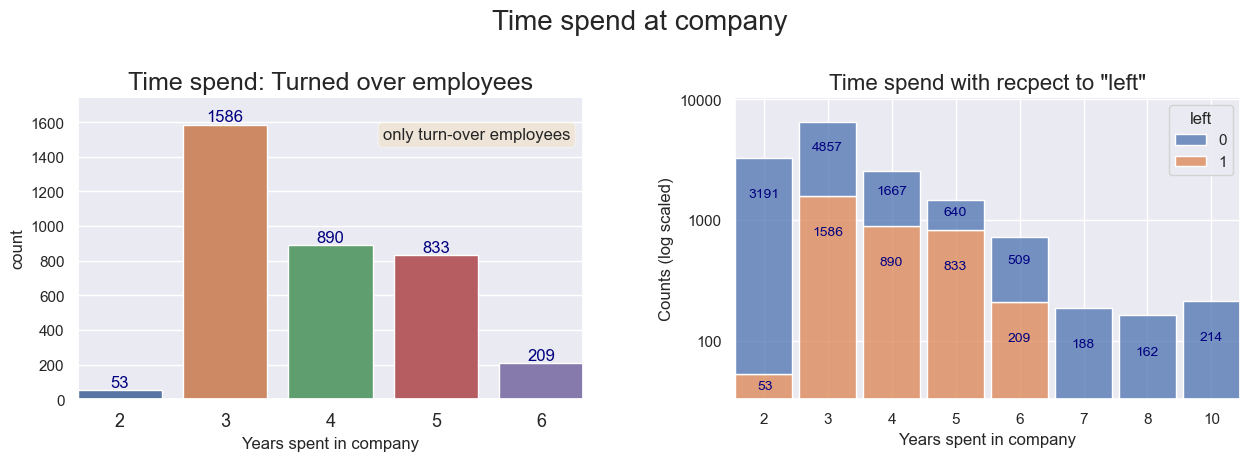

In [781]:
# # Show the plot for the count of years here
fig = plt.figure( figsize=(15,4), dpi=100)
plt.suptitle('Time spend at company', fontsize=20, y=1.1);
fig.subplots_adjust( wspace=.3)

ax1 = plt.subplot(1,2,1)
ax1 = sns.countplot(data=df[df['left']==1], x='time_spend_company')
plt.title('Time spend: Turned over employees', fontsize=18);
box = dict(boxstyle='round', facecolor='wheat', alpha=0.4)
plt.text(2.5,1500,'only turn-over employees', bbox=box, fontsize=12)
plt.margins(x=0.0, y=0.1)
plt.xlabel('Years spent in company')
plt.xticks(fontsize=13)
for container in ax1.containers:
    plt.bar_label(container, fontsize=12, color='navy')

ax2 = plt.subplot(1,2,2)
df['time_spend_company_temp']=df.time_spend_company.astype('str')
plt.title('Time spend with recpect to "left"', fontsize=16)
ax2 = sns.histplot(data=df.sort_values(by='time_spend_company'), x="time_spend_company_temp", hue="left", multiple="stack", shrink=.9)
plt.yscale('log')
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.margins(x=0.0, y=0.1)
plt.ylabel('Counts (log scaled)')
plt.xlabel('Years spent in company')
for c in ax2.containers:
    labels = [int(value) if value!=0 else '' for value in c.datavalues]
    ax2.bar_label(c, labels=labels,fontsize=10, color='navy', label_type='center')
df.drop('time_spend_company_temp', axis=1, inplace=True)
plt.text(-0.1,40,'53',fontsize=10, color='navy');

In [782]:
df[df['left']==1].groupby('left').time_spend_company.value_counts(normalize=True).to_frame('Turn Over %').droplevel(0)*100

,Turn Over %
time_spend_company,
3,44.41
4,24.92
5,23.33
6,5.85
2,1.48



### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">In above plots, We can clearly see that **majority** of employees **leave** the company after **3 years**.  </font>

**Question: What is the maximum number of time spend by the employees?**

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">**Maximum years spent** by an employ **who left**, is $6$ year.  </font>
>     * All employees who worked more than 6 years, are still serving the company.

In [783]:
# Write the code here to get the percentage of employees leaving.
leave_p = df[df['left']==1].groupby('left').time_spend_company.value_counts(normalize=True).to_frame('leaving %').droplevel(0)*100
leave_p

,leaving %
time_spend_company,
3,44.41
4,24.92
5,23.33
6,5.85
2,1.48


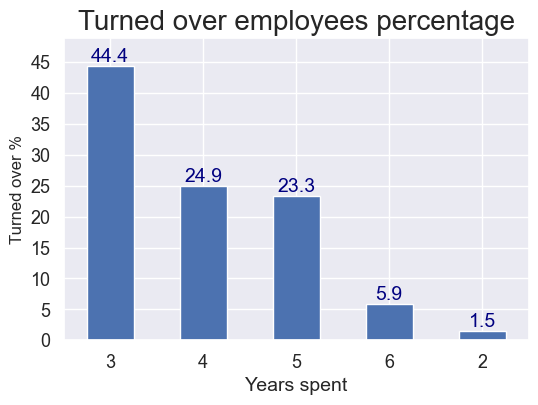

In [784]:
# Write the code here to draw a bar plot showing years after which employees are likely to leave
plt.figure(dpi=100)
ax = leave_p['leaving %'].sort_values(ascending = False).plot(kind='bar')
plt.margins(0,0.1)
plt.yticks(range(0,48,5), fontsize=13);
plt.title('Turned over employees percentage', fontsize=20)
plt.bar_label(ax.containers[0], label_type='edge', fmt='%.1f', fontsize=14,color='navy');
plt.xlabel('Years spent',fontsize=14);
plt.ylabel('Turned over %')
plt.xticks(rotation=0, fontsize=13);

**Question: After what time period are employees most likely to leave the company ?**


### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">In above plots, We can clearly see that **majority** of employees **leave** the company after **3 years**.  </font>

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

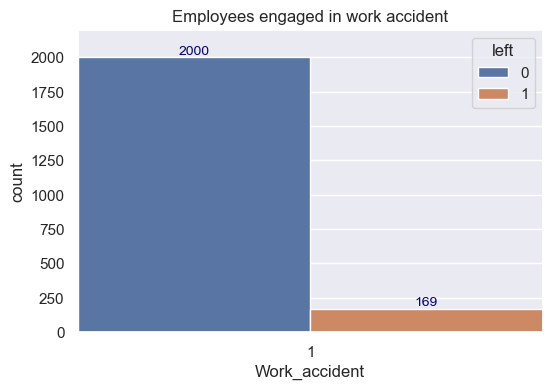

In [785]:
fig = plt.figure(dpi=100)
ax2 = sns.countplot(data=df[df.Work_accident ==1], x='Work_accident', hue='left');
plt.margins(0,0.1)
plt.title('Employees engaged in work accident');
for c in ax2.containers:
    labels = [int(value) if value!=0 else '' for value in c.datavalues]
    ax2.bar_label(c, labels=labels,fontsize=10, color='navy', label_type='edge')


**Question: What can you conclude from the graph above?**

### Answer:
> * <font face="Comic sans MS" size="3" color="blue">Majority of employees who met accident, **did not** leave the company.   </font>

In [786]:
# Number of employees involved in work accident and left or not left

print(f'Employees engaged in work accident:  {df[df.Work_accident==1].Work_accident.sum()}')

accident_counts = df[df.Work_accident ==1].groupby('Work_accident').left.value_counts().to_frame('counts').reset_index()
accident_counts

Employees engaged in work accident:  2169


,Work_accident,left,counts
0,1,0,2000
1,1,1,169


## **Promotions in last 5 years**

**Task 8: How many number of employees got the promotion in last 5 year and how many of them left?**

In [787]:
print(f'Number of employees got the promotion in last 5 year:  {df[df.promotion_last_5years==1].promotion_last_5years.sum()}')

df[df.promotion_last_5years ==1].groupby('promotion_last_5years').left.value_counts().to_frame('counts').reset_index()

Number of employees got the promotion in last 5 year:  319


,promotion_last_5years,left,counts
0,1,0,300
1,1,1,19


### Answer:
> * <font face="Comic sans MS" size="3" color="blue">Total **$319$ employees** were promoted in past 5 years and only $19$ of them left. </font>

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

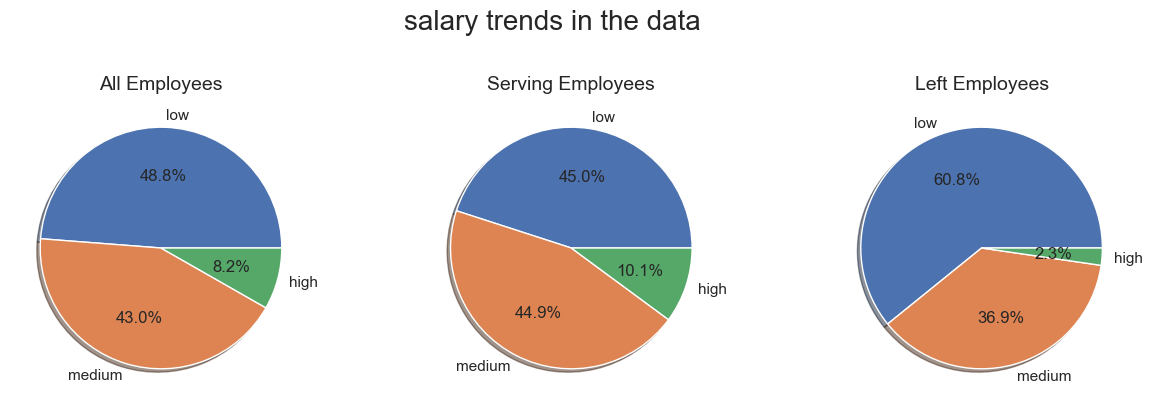

In [788]:
y_all= list(df.salary.value_counts().to_frame().salary)
L_all= list(df.salary.value_counts().to_frame().salary.index)
y_still= list(df[df.left==0].salary.value_counts().to_frame().salary)
L_still= list(df[df.left==0].salary.value_counts().to_frame().salary.index)
y_left= list(df[df.left==1].salary.value_counts().to_frame().salary)
L_left= list(df[df.left==1].salary.value_counts().to_frame().salary.index)

fig = plt.figure( figsize=(15,4), dpi=100)
plt.suptitle('salary trends in the data', fontsize=20, y=1.1);
#fig.subplots_adjust( wspace=.1)

ax1 = plt.subplot(1,3,1)
plt.pie(y_all, labels = L_all, shadow = True, autopct='%1.1f%%');
plt.title('All Employees', fontsize=14);

ax1 = plt.subplot(1,3,2)
plt.pie(y_still, labels = L_still, shadow = True, autopct='%1.1f%%');
plt.title('Serving Employees', fontsize=14);

ax1 = plt.subplot(1,3,3)
plt.pie(y_left, labels = L_left, shadow = True, autopct='%1.1f%%');
plt.title('Left Employees', fontsize=14);

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

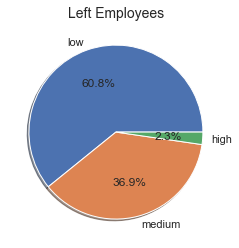

In [789]:
plt.pie(y_left, labels = L_left, shadow = True, autopct='%1.1f%%');
plt.title('Left Employees', fontsize=14);

**Question: What does the above plot show?**

### Answer:
> * <font face="Comic sans MS" size="3" color="blue">Employees with low salaries left the most.</font>

## **Employees per Department**

**Task 10: Find out employees per department and also see which which department has highest number of employees leaving the company.**

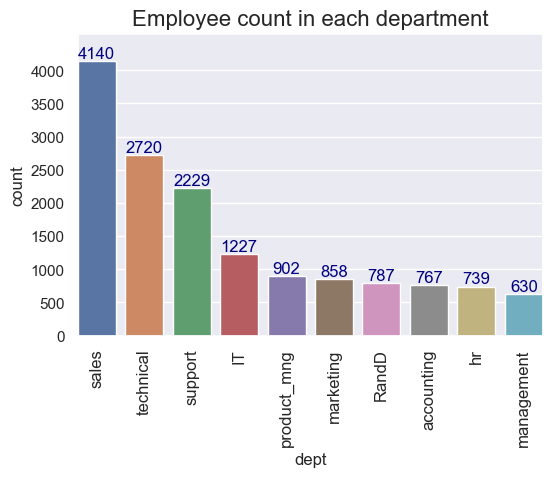

In [790]:
# Write the code here to check employee count in each department.
# You can use a graphical representation or use simple code to check.

plt.figure(dpi=100)
order= list(df.dept.value_counts().index)
ax = sns.countplot(data = df, x='dept', order =order)
plt.title('Employee count in each department', fontsize=16)
plt.margins(0,0.1)
plt.xticks(rotation=90, fontsize=12);
plt.yticks(range(0,4500,500));
for container in ax.containers:
    plt.bar_label(container, color = 'navy')

**Question: Which department has maximum number of employees?**

### Answer:
> * <font face="Comic sans MS" size="4" color="blue">Sales, with total counts of 4140.</font>

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

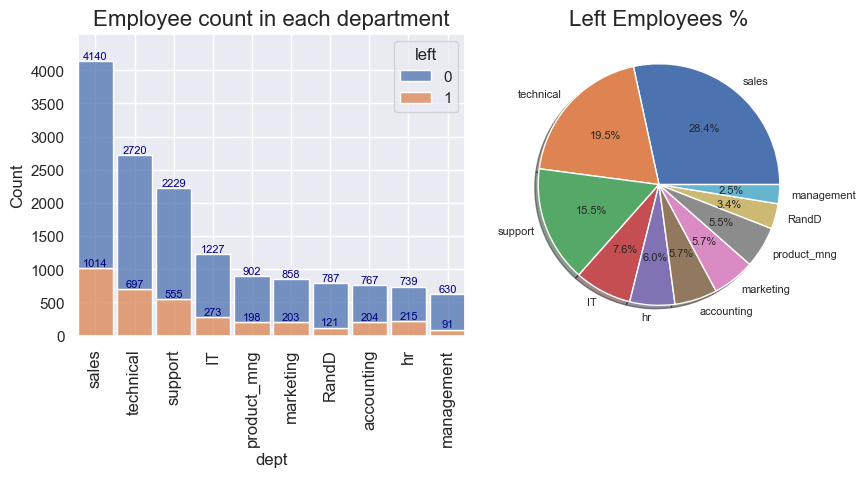

In [806]:
# Write code here to draw the plot
fig = plt.figure( figsize=(15,4), dpi=100)
fig.subplots_adjust( wspace=0)

ax1 = plt.subplot(1,3,1)
order= list(df.dept.value_counts().index)
df['dept'] = pd.Categorical(df['dept'], order)
ax = sns.histplot(data = df, x='dept', hue='left', multiple="stack", shrink=.9, hue_order=None)

plt.title('Employee count in each department', fontsize=16)
plt.margins(0,0.1)
plt.xticks(rotation=90, fontsize=12);
plt.yticks(range(0,4500,500));
for container in ax.containers:
    plt.bar_label(container, color = 'navy', fontsize=8)

ax1 = plt.subplot(1,3,2)
y_left= list(df[df.left==1].dept.value_counts().to_frame().dept)
L_left= list(df[df.left==1].dept.value_counts().to_frame().dept.index)
plt.pie(y_left, labels = L_left, shadow = True, autopct='%1.1f%%',textprops={'fontsize': 8});
plt.title('Left Employees %', fontsize=16);

### Answer:
> * <font face="Comic sans MS" size="4" color="blue">Sales department, with total 1014 employees left the compnay, which is 28.4% of over all turn-over.</font>

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

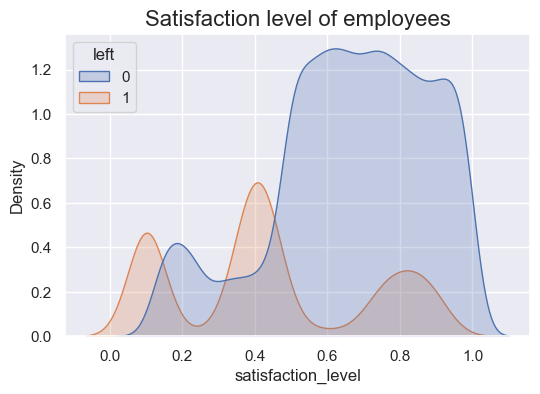

In [792]:
# Write the code here
plt.figure(dpi=100)
ax1 = sns.kdeplot(data=df, x='satisfaction_level', hue='left',fill=True);
sns.move_legend(ax1, "upper left")
plt.title('Satisfaction level of employees', fontsize=16);

**Question: What can you conclude from the plot above?**

### Answer:
> * <font face="Comic sans MS" size="4" color="blue">Employees who left, had low level of Satisfaction.</font>

> * <font face="Comic sans MS" size="4" color="blue">While in blue, we can see that employee's serving employee's satisfaction level is high, i.e. above 5.  .</font>

# Feature Engineering

In [794]:
df=data.copy()
data= df.copy()

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

In [800]:
# Write the code here to make bins as mentioned above
df['satisfaction_level_type'] = df['satisfaction_level'].apply(lambda x: 'High' if x >= 0.5 else 'Low')

**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

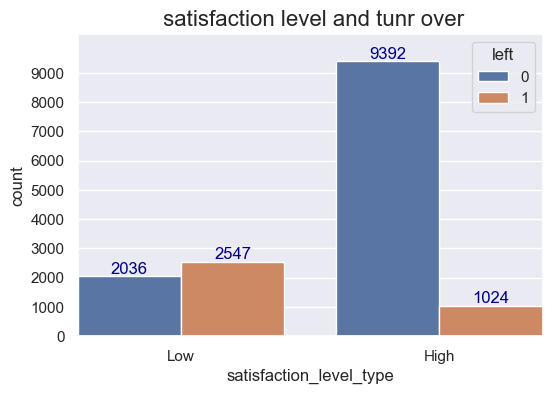

In [823]:
# Write Code Here
plt.figure(dpi=100)
ax1 = sns.countplot(data=df, x='satisfaction_level_type', hue='left');
plt.margins(0,0.1)
plt.title(' satisfaction level and tunr over', fontsize=16);
plt.yticks(range(0,10000,1000))
for container in ax1.containers:
    plt.bar_label(container, color = 'navy', fontsize=12)

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

**Make a Plot of your findings**

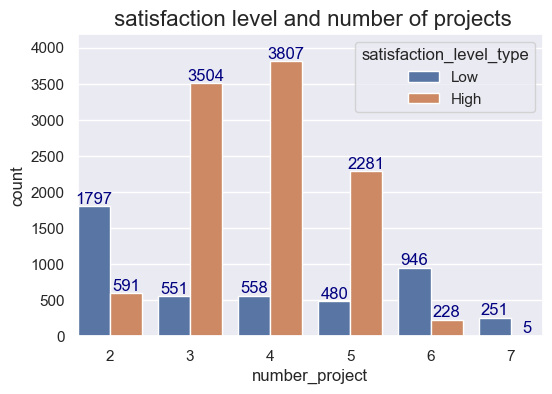

In [828]:
plt.figure(dpi=100)
ax1 = sns.countplot(data=df, x='number_project', hue='satisfaction_level_type');
plt.margins(0,0.1)
plt.title(' satisfaction level and number of projects', fontsize=16);
#plt.yticks(range(0,10000,1000))
for container in ax1.containers:
    plt.bar_label(container, color = 'navy', fontsize=12)

**Question:** What did you infer from the above plot

### Answer:
> * <font face="Comic sans MS" size="4" color="blue"> we can see that employee working on 2 projects had some how, low satisfaction level .</font>

Now lets check number of projects for low satisfaction level

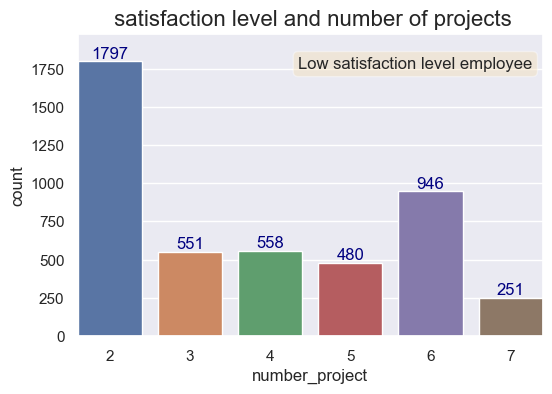

In [850]:
# Write Code Here
plt.figure(dpi=100)
ax1 = sns.countplot(data=df[df.satisfaction_level_type=='Low'], x='number_project');
plt.margins(0,0.1)
plt.title(' satisfaction level and number of projects', fontsize=16);
#plt.yticks(range(0,10000,1000))
for container in ax1.containers:
    plt.bar_label(container, color = 'navy', fontsize=12)
plt.text(2.35,1750,'Low satisfaction level employee', bbox=box, fontsize=12);

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

In [851]:
df['employee_type'] = np.where(df['number_project'] == 2, 'unburdened', 
                 np.where((df['number_project'] >= 3) & (df['number_project'] <= 5), 'Satisfactory', 'Burdened'))

**Task 15: Make a countplot to see which type of employee is leaving**

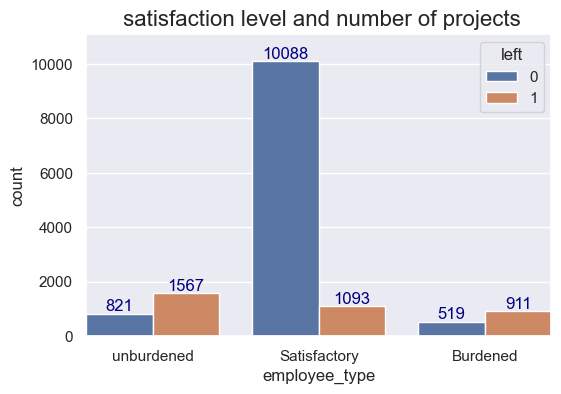

In [860]:
# Write code here
plt.figure(dpi=100)
ax1 = sns.countplot(data=df, x='employee_type', hue='left');
plt.margins(0,0.1)
plt.title(' satisfaction level and number of projects', fontsize=16);
#plt.yticks(range(0,10000,1000))
for container in ax1.containers:
    plt.bar_label(container, color = 'navy', fontsize=12)

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [864]:
df.drop(['satisfaction_level', 'number_project'], axis=1, inplace=True) 

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

In [865]:
df.dtypes

last_evaluation             float64
average_montly_hours          int64
time_spend_company            int64
Work_accident                 int64
left                          int64
promotion_last_5years         int64
dept                       category
salary                       object
satisfaction_level_type      object
employee_type                object
dtype: object

**Task 16: Do ONE HOT ENCODING of the above mentioned variables**

In [ ]:
# Write code here


**Task 17: Creating Independant and Dependant Variables**

In [ ]:
# Write code here
X=None
Y=None

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Write code here



In [ ]:
print(xtrain.shape, ytrain.shape)
print(xtest.shape,ytest.shape)

**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [ ]:
# Importing the model from sklearn


In [ ]:
# Making instance and training the model


In [ ]:
# Get predictions
rf_pred=None

**Precision**

In [ ]:
# Write the code to import the function for calculation of the specific score


In [ ]:
#Write the code to calculate
rf_precion= None

**Accuracy**

In [ ]:
# Write the code to import the function for calculation of the specific score


In [ ]:
# Write the code to calculate
rf_acc=None

**Recall**

In [ ]:
# Write the code to import the function for calculation of the specific score


In [ ]:
# Write the code to calculate
rf_recall=None

**F1-Score**

In [ ]:
# Write the code to import the function for calculation of the specific score


In [ ]:
# Write the code to calculate
rf_f1_score=None

**Classification Report**

In [ ]:
# Write the code to import the function for calculation of the specific score


In [ ]:
#Write the code to calculate


## Logistic Regression

In [ ]:
# Import the model


In [ ]:
# Create instance and train, random _state=100


In [ ]:
# get the predictions
lr_pred=None

**Accuracy**

In [ ]:
#Write the code here
lr_accuracy=None

**Precision**

In [ ]:
#Write the code here
lr_precision=None

**Recall**

In [ ]:
#Write the code here
lr_recall=None

**F1 Score**

In [ ]:
#Write the code here
lr_f1_score=None

**Classification Report**

In [ ]:
#Write the code here


## Ada Boost

In [ ]:
#Write the code here to import the model


In [ ]:
#Write the code here to make an instance and train the model with random state =100
 

In [ ]:
# Get the predictions
pred_clf_adb=None

**Accuracy**

In [ ]:
#Write code here
ab_accuracy= None

**Precision**

In [ ]:
#Write code here
ab_precision= None

**Recall**

In [ ]:
#Write code here
ab_recall= None

**F1-Score**

In [ ]:
#Write code here
ab_f1_score=None

**Classification Report**

In [ ]:
#Write code here


## XG Boost

In [ ]:
#Write the code here to import the model


In [ ]:
#Write the code here to make an instance and train the model with random state =100
 

In [ ]:
# Get the predictions
pred_clf_xgb=None

**Accuracy**

In [ ]:
#Write code here
xgb_accuracy= None

**Precision**

In [ ]:
#Write code here
xgb_precision= None

**Recall**

In [ ]:
#Write code here
xgb_recall= None

**F1-Score**

In [ ]:
#Write code here
xgb_f1_score=None

**Classification Report**

In [ ]:
#Write code here


# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [ ]:
# Write the code here


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: 